**Nombres y matrículas de los integrantes del equipo:**

*   Genaro Rodriguez Vazquez A01150931
*   Juan Pablo Acosta López  A01794035
*   Mario Alberto Corona Cadenas  A01793016
*   Maria Nelly Porras Alcantar A01793828
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

from matplotlib.cbook import print_cycles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import seaborn as sns 
from tabulate import tabulate

from sklearn.pipeline import Pipeline
#from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
#from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score

#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


from sklearn.metrics import classification_report, make_scorer
#from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight

#**Ejercicio-1.** 

    Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.

In [2]:
#def LoadandFormatData():
df = pd.read_csv('SouthGermanCredit.asc', sep=" ")


df = df.rename(columns={"laufkont":"status"})
df = df.rename(columns={"laufzeit":"duration"})
df = df.rename(columns={"moral":"credit_history"})
df = df.rename(columns={"verw":"purpose"})
df = df.rename(columns={"hoehe":"amount"})
df = df.rename(columns={"sparkont":"savings"})
df = df.rename(columns={"beszeit":"employment_duration"})
df = df.rename(columns={"rate":"installment_rate"})
df = df.rename(columns={"famges":"personal_status_sex"})
df = df.rename(columns={"buerge":"other_debtors"})
df = df.rename(columns={"wohnzeit":"present_residence"})
df = df.rename(columns={"verm":"property"})
df = df.rename(columns={"alter":"age"})
df = df.rename(columns={"weitkred":"other_installment_plans"})
df = df.rename(columns={"wohn":"housing"})
df = df.rename(columns={"bishkred":"number_credits"})
df = df.rename(columns={"beruf":"job"})
df = df.rename(columns={"pers":"people_liable"})
df = df.rename(columns={"telef":"telephone"})
df = df.rename(columns={"gastarb":"foreign_worker"})
df = df.rename(columns={"kredit":"credit_risk"})   #This is our output variable to predict "Y"
#return df

#df = LoadandFormatData()    
pd.get_option("display.max_columns", None)
df.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


#**Ejercicio-2.** 

    Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es necesario en este paso generar el conjunto de validación. Define como la variable X a todas las variables de entrada y a la variable Y como la variable de salida.

(850, 20) : dimensión de datos de entrada "X" para entrenamiento y validación
(150, 20) : dimensión de datos de entrada "X" para prueba
(850,) : dimensión de variable de salida  "Y" para  entrenamiento y validación
(150,) : dimensión de variable de salida "Y" para prueba
Balanceo:  0.7


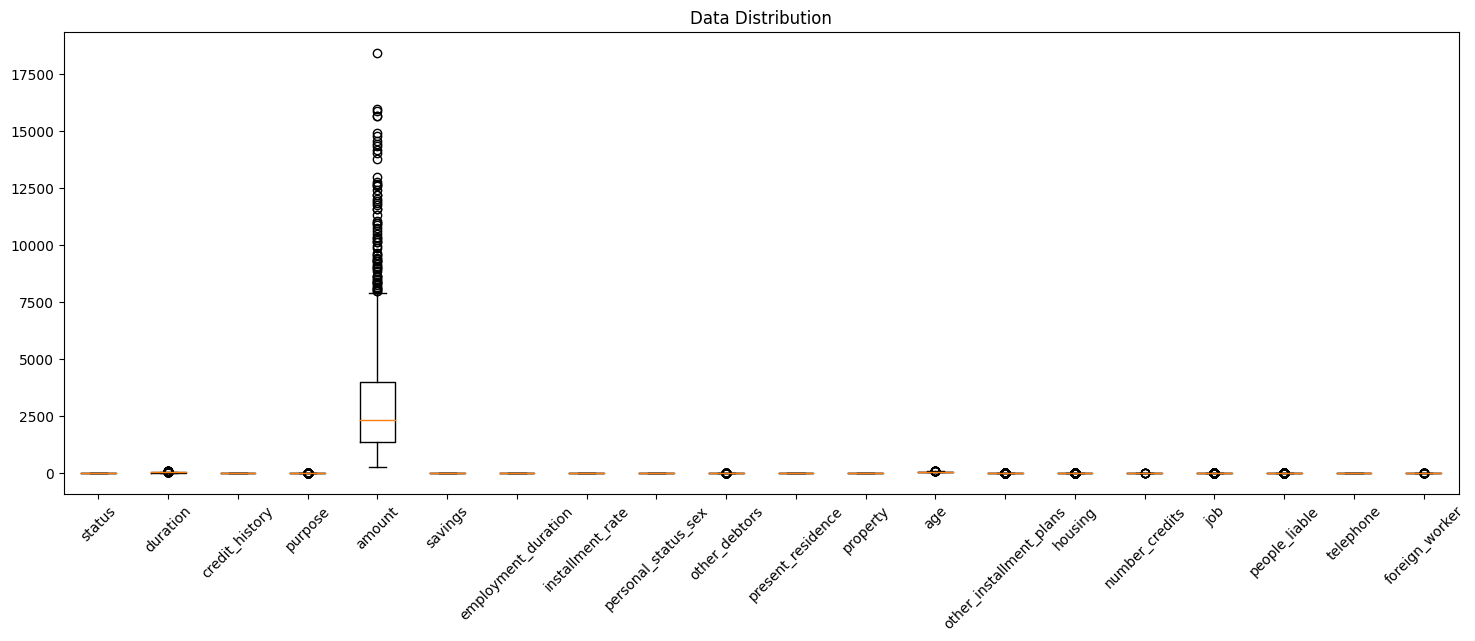

In [3]:
X = df.drop('credit_risk', axis='columns')  
y = df['credit_risk']  

#Ejercicio 2
#Training and validation are 85%       Testing is 15%
Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size=.15, shuffle=True, random_state=1, stratify=y)
#X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=.20, shuffle=True, random_state=1)

print(Xtv.shape, ': dimensión de datos de entrada "X" para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada "X" para prueba')  

print(ytv.shape, ': dimensión de variable de salida  "Y" para  entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida "Y" para prueba')

print("Balanceo: " , ytv.sum() / ytv.shape[0])

plt.figure(figsize= (18, 6))
plt.boxplot(X, labels=X.columns)
plt.title("Data Distribution")
plt.xticks(rotation = 45);
plt.show()

#**Ejercicio-3a.**

    Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal (discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha información realiza un Pipeline que incluya al menos las siguientes transformaciones:

In [4]:
"""
Ejercicio 3.-a
Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable
(decide y justifica que tipo de imputación realizas en cada caso).
"""

#def ImputateData(df):
#All types int64 are 'quantitative' type
# Binary and categorical types have their description underneath

#Variable ordinal(discretized quantitative)
#df = df.astype({"status":"int64"})
""" 1 : no checking account                       
2 : ... < 0 DM                                
3 : 0<= ... < 200 DM                          
4 : ... >= 200 DM / salary for at least 1 year"""

df = df.astype({"duration":"int64"})

df = df.astype({"credit_history":"category"})
"""0 : delay in paying off in the past            
1 : critical account/other credits elsewhere   
2 : no credits taken/all credits paid back duly
3 : existing credits paid back duly till now   
4 : all credits at this bank paid back duly  """

df = df.astype({"purpose":"category"})
""" 0 : others             
1 : car (new)          
2 : car (used)         
3 : furniture/equipment
4 : radio/television   
5 : domestic appliances
6 : repairs            
7 : education          
8 : vacation           
9 : retraining         
10 : business """

df = df.astype({"amount":"int64"})

#Variable ordinal(discretized quantitative)
#df = df.astype({"savings":"category"})
""" 1 : unknown/no savings account
2 : ... <  100 DM             
3 : 100 <= ... <  500 DM      
4 : 500 <= ... < 1000 DM      
5 : ... >= 1000 DM   """

#Variable ordinal(discretized quantitative)
#df = df.astype({"employment_duration":"int64"})
""" 1 : unemployed      
2 : < 1 yr          
3 : 1 <= ... < 4 yrs
4 : 4 <= ... < 7 yrs
5 : >= 7 yrs     """

#Variable ordinal(discretized quantitative)
#df = df.astype({"installment_rate":"int64"})
""" 
 1 : >= 35         
 2 : 25 <= ... < 35
 3 : 20 <= ... < 25
 4 : < 20   
"""

df = df.astype({"personal_status_sex":"category"})
""" 1 : male : divorced/separated           
2 : female : non-single or male : single
3 : male : married/widowed              
4 : female : single     """

df = df.astype({"other_debtors":"category"})
""" 1 : none        
2 : co-applicant
3 : guarantor   """

#Variable ordinal(discretized quantitative)
#df = df.astype({"present_residence":"int64"})
"""" 1 : < 1 yr          
2 : 1 <= ... < 4 yrs
3 : 4 <= ... < 7 yrs
4 : >= 7 yrs    """

df = df.astype({"property":"category"})
""" 1 : unknown / no property                    
2 : car or other                             
3 : building soc. savings agr./life insurance
4 : real estate     """

df = df.astype({"age":"int64"})

df = df.astype({"other_installment_plans":"category"})
""" 1 : bank  
2 : stores
3 : none  """

df = df.astype({"housing":"category"})
""" 1 : for free
2 : rent    
3 : own   """

#Variable ordinal(discretized quantitative)
#df = df.astype({"number_credits":"int64"})
""" 1 : 1   
2 : 2-3 
3 : 4-5 
4 : >= 6"""

#NO ES ORDINAL
df = df.astype({"job":"category"})
""" 1 : unemployed/unskilled - non-resident       
2 : unskilled - resident                      
3 : skilled employee/official                 
4 : manager/self-empl./highly qualif. employee"""


df = df.astype({"people_liable":"category"})
""" 1 : 3 or more
2 : 0 to 2   """

########### Los datos binarios no necesariamente se tiene que pasar por una trasnformacion          ###########
########### de one hot encoding, a menos que en el dataset vinieran definidos como                  ###########
########### TRUE or FALSE realmente, sin embargo en este ejemplo ya vienen definidos como 1 o 2     ###########
########### y para el caso de nuestra variable a predecir, vienen definidos como 0 y 1              ###########
########### La razon principal de hacer el one hot encoding a datos binarios, es para no tener      ###########
########### un dataset mezclado con numeros y strings (True or False)                               ###########

#binaria (binary)
df = df.astype({"telephone":"bool"})
""" 1 : no                       
2 : yes (under customer name)"""

#binaria (binary)
df = df.astype({"foreign_worker":"bool"})
""" 1 : yes
2 : no """

#This is our output variable to predict "Y"
#binaria (binary)
df = df.astype({"credit_risk":"bool"}) 
""" 0 : bad 
1 : good"""

#print(df.dtypes)

#ImputateData(df)
df.dtypes

status                        int64
duration                      int64
credit_history             category
purpose                    category
amount                        int64
savings                       int64
employment_duration           int64
installment_rate              int64
personal_status_sex        category
other_debtors              category
present_residence             int64
property                   category
age                           int64
other_installment_plans    category
housing                    category
number_credits                int64
job                        category
people_liable              category
telephone                      bool
foreign_worker                 bool
credit_risk                    bool
dtype: object

#**Ejercicio-3.b  y  3c**

In [5]:
#Define each pipeline for each type of category
#Estas series NO SE ESCALARAN en el pipeline, el PDF menciona que por el momento las ordinales no se transformaran.
OrdinalList = ['status','savings','employment_duration','installment_rate','present_residence','number_credits','job']
NumericList = ['duration','amount','age']
CategoricalList = ['credit_history','purpose','personal_status_sex','other_debtors','property','other_installment_plans','housing','people_liable']
BinaryList = ['telephone','foreign_worker']


"""Ejercicio 3.-b
Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una
transformación que escale a todas ellas en un rango equiparable."""
NumericColumnsPipeline = Pipeline(steps= [('MinMax', MinMaxScaler(feature_range=(1, 2)))])


"""
Ejercicio 3.-c
Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y
binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la
transformación one-hot encoding. Por el momento dejar las variables ordinales sin
transformar.
"""
CategoricalColumnsPipeline = Pipeline(steps= [('OneHotEncoder', OneHotEncoder(handle_unknown = 'ignore'))])
BinaryColumnsPipeline = Pipeline(steps= [('OneHotEncoder', OneHotEncoder(handle_unknown = 'ignore', drop = 'first'))])

#Define the column transformer that applies pipelines
TransformColumns = ColumnTransformer(transformers = [('numerical',NumericColumnsPipeline,NumericList),
                                                    ('CategoricalList',CategoricalColumnsPipeline,CategoricalList),
                                                    ('BinaryList',BinaryColumnsPipeline,BinaryList)]
                                                    ,remainder='passthrough')

#Call column transformer
XtrainFit = TransformColumns.fit(Xtv)
XtrainTransf = pd.DataFrame(XtrainFit.transform(Xtv))


pd.set_option('display.max_columns', None)

#To check how many columns we have after the column transformation (One hot encoding will add  some....)
XtrainTransf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,1.205882,1.138707,1.410714,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,5.0,5.0,4.0,2.0,2.0,3.0
1,1.294118,1.705830,1.178571,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,4.0
2,1.382353,1.217012,1.535714,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,5.0,5.0,4.0,4.0,2.0,2.0
3,1.029412,1.061102,1.500000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,4.0,4.0,1.0,4.0
4,1.117647,1.058171,1.446429,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,4.0,3.0,3.0,4.0,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,1.117647,1.032877,1.839286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,3.0,3.0,4.0,3.0,1.0,2.0
846,1.382353,1.253011,1.160714,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,3.0,2.0,1.0,2.0,3.0
847,1.205882,1.149729,1.821429,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0,4.0,4.0,2.0,3.0
848,1.382353,1.229818,1.375000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,4.0,1.0,4.0


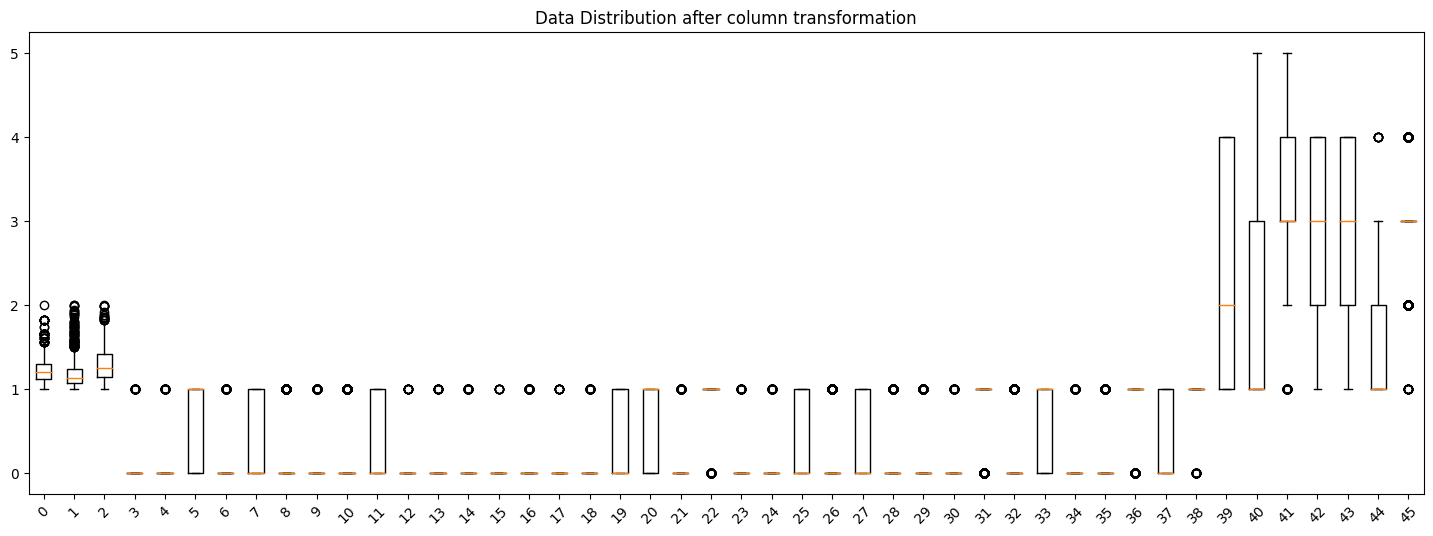

In [6]:
plt.figure(figsize= (18, 6))
plt.boxplot(XtrainTransf, labels=XtrainTransf.columns)
plt.title("Data Distribution after column transformation")
plt.xticks(rotation = 45);
plt.show()

#**This are our own formulas for scoring:**

In [7]:
def mi_cm(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)

  txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']
  vf = [ '( VN )', '( FP )', '( FN )', '( VP )']
  frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in zip(txt,vf, frecuencia,porcentaje)]
  labels = np.asarray(labels).reshape(2,2)

  plt.figure(figsize=(6,4));
  ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Pastel1', cbar=False);
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción");
  plt.show();

def mi_precision(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)
    tot = cm.sum()
    fp = 100*cm[0,1] / tot
    vp = 100*cm[1,1] / tot
    precision = vp / ( vp+fp)
    return precision
def mi_recall(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)
    tot = cm.sum()
    fn = 100*cm[1,0] / tot
    vp = 100*cm[1,1] / tot
    recall = vp / (vp+fn)
    return recall  
def mi_f1score(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)
    tot = cm.sum()
    fp = 100*cm[0,1] / tot
    fn = 100*cm[1,0] / tot
    vp = 100*cm[1,1] / tot
    f1score = 2*vp / (2*vp+fp+fn)  
    return f1score     
def mi_especificidad(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)
    tot = cm.sum()
    fp = 100*cm[0,1] / tot
    vn = 100*cm[0,0] / tot
    especificidad = vn / (vn+fp)  
    return especificidad      
def mi_gmean(yreal, ypred):
     cm = confusion_matrix(yreal, ypred)
     tot = cm.sum()
     vn = 100*cm[0,0] / tot
     fp = 100*cm[0,1] / tot
     fn = 100*cm[1,0] / tot
     vp = 100*cm[1,1] / tot
     f1 = vp / (vp+fn)
     especificidad = vn / (vn+fp)
     gmean = np.sqrt(f1 * especificidad)
     #display(gmean)   
     return gmean    

Our list of models to try and score:

In [8]:
def get_models():
    """
    Ejercicio 4.-a
    Usa los parámetros predeterminados de cada modelo. 
    """
    modelos = list()
    nombres = list()
    # LR - Regresión Logística:
    modelos.append(LogisticRegression(solver='lbfgs', max_iter=1000))   # Incializamos el modelo con los hiperparámetros predeterminados.
    nombres.append('LogisticReg')

    # DT - Arbol de decisiones:
    modelos.append(DecisionTreeClassifier())
    nombres.append('Decision Tree')
    
    # RF - Bosque aleatorio:
    modelos.append(RandomForestClassifier(n_estimators=10,  # número de árboles en el Forest y después promedia por votación.
                                    criterion='gini',       # métrica para determinar las ramas. También puede ser: 'entropy', para la GananciaDeInformación (IG).
                                    max_depth=2,            # Depth=k : máximo 2^k líneas/ramas.        
                                    min_samples_split = 6,  # mínimo de puntos muestrales requeridos en un nodo para hacer la ramificación. Puede ser fracción de 0 a 1.
                                    min_samples_leaf = 4,   # mínimo de puntos muestrales que deben quedar en cada nueva ramificación (hojas). Puede ser fracción de 0 a 1.
                                    max_features= 'sqrt',   # número de características (features) que se consideran en cada ramificación: auto=sqrt(n_features).
                                    max_leaf_nodes=16,      # solo nos quedamos con las mejores k hojas.
                                    bootstrap=True,         # Cada Árbol se muestrea seleccionando la cantidad de datos del conjunto de entrenamiento, pero con reemplazo. False:los datos usados en cada árbol simpre es el mismo, el Train-set.
                                    oob_score=False,        # en caso de utilizar Out-of-bag samples.
                                    verbose=0,              # tipo de despliega de información durante el entrenamiento.
                                    n_jobs=-1,              # total de hilos a usar en las rutinas paralelizables: "-1" :usar todos los posibles. 
                                    max_samples=None,       # Cuando se usa Boostrap, es el total de datos de Xtrain a usar en cada árbol. "None" usará Xtrain[0]. 
                                    random_state=19)
                                    )
    nombres.append('Random forest')
    return modelos, nombres

#**Ejercicio 4**

    a. Usa los parámetros predeterminados de cada modelo.

    b. En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision,
    f1, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes
    definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn.
    Sin embargo, sí puedes usar la información regresada por el método confusion_matrix()
    de scikit-learn para definir las métricas).

    c. Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones.

    d. Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como
    para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la
    métrica “f1”. 
    
    
    
    ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu
    respuesta.

El modelo de regresion logistica muestra algo de varianza, nunca convergen sus curvas de entrenamiento y validacion y la causa raiz puede ser un ligero sobreentrenamiento por demasiadas variables de entrada X, que debido a la poca correlacion entre las mismas, origina esta alta varianza.

El modelo de arbol de decisiones arroja evidencia de que se encuentra sobreentrenado, puesto que despues de que el tamaño de conjunto de entrenamiento es > 2, la curva de f1score del ENTRENAMIENTO se comienza a despegar de la de validacion, llegando al 100% de precisión.

El modelo de bosque aleatorio tambien se encuentra sobreentrenado una vez mas, su curva comienza en 100% desde la primera iteracion, es decir con el primer conjunto de entrenamiento, y se mantiene ahi de forma permanente, mientras que su recall oscila entre 91% y 92%, a su vez notamos que la varianza es mucho mayor que con el modelo de arbol de decisiones.



In [9]:
"""Ejercicio 4.-a
Usa los parámetros predeterminados de cada modelo.
"""

modelos, nombres = get_models()  # cargamos los modelos a comparar


Printing on a beautiful table:
| Random forest   |   test_precision |   train_precision |   test_recall |   train_recall |   test_f1score |   train_f1score |   test_gmean |   train_gmean |
|-----------------|------------------|-------------------|---------------|----------------|----------------|-----------------|--------------|---------------|
| LogisticReg     |             0.80 |              0.82 |          0.87 |           0.91 |           0.83 |            0.86 |         0.65 |          0.70 |
| Decision Tree   |             0.78 |              1.00 |          0.78 |           1.00 |           0.78 |            1.00 |         0.62 |          1.00 |
| Random forest   |             0.71 |              0.71 |          1.00 |           1.00 |           0.83 |            0.83 |         0.12 |          0.16 |


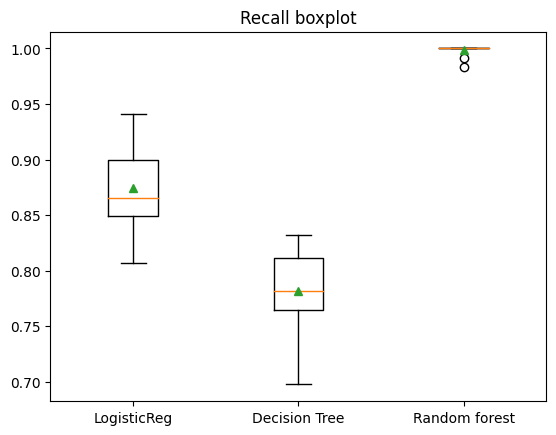

In [10]:
#Testing iterations

resultados = list()
tabla = list()
f1_list = list()

# Ejercicio 4.-c.  
# Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

# Ejercicio 4.-b
for i in range(len(modelos)):

    pipeline = Pipeline(steps=[('ct',TransformColumns),('m',modelos[i])])
    
    mismetricas = {'precision':make_scorer(mi_precision), 'recall':make_scorer(mi_recall),'f1score':make_scorer(mi_f1score), 'gmean':make_scorer(mi_gmean) }

    # Train and validation scoring
    scores = cross_validate(pipeline, Xtv, np.ravel(ytv), scoring=mismetricas , cv=cv, return_train_score=True)

    # Returns a 2D Dataframe with each defined scoring like this (n_splits x n_repeats):
    ###            fit_time  score_time  test_accuracy  test_gmean  test_f1         .....
    ###        0   0.054359    0.011969        0.73750    0.615554     0.866071     .....
    ###        1   0.062003    0.011998        0.71875    0.627376     0.821429     .....
    ###        2   0.059530    0.011961        0.80000    0.646505     0.955357     .....
    ###        3   0.054882    0.011971        0.75000    0.664664     0.848214     .....
    #print(pd.DataFrame(scores))
    resultados.append(scores) 
    #print(scores.mean())

    tabla.append([nombres[i], np.mean(scores['test_precision']), np.mean(scores['train_precision']),
                     np.mean(scores['test_recall']), np.mean(scores['train_recall']),
                     np.mean(scores['test_f1score']), np.mean(scores['train_f1score']),
                     np.mean(scores['test_gmean']), np.mean(scores['train_gmean'])])

#To see the returned scores from the cross validation
#print(scores.keys())

""" Ejercicio 4.-d.  
Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como
para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la
métrica “f1”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu
respuesta
"""
print("Printing on a beautiful table:")
print(tabulate(tabla, 
        headers=[nombres[i], 'test_precision', 'train_precision', 
                             'test_recall', 'train_recall',
                             'test_f1score', 'train_f1score',
                             'test_gmean', 'train_gmean'], 
        tablefmt="github", 
        floatfmt=".2f"
   	))


Box_plott_Recall = list()
for i in range(len(resultados)):
    rr = resultados[i]['test_recall']
    #print(rr)
    Box_plott_Recall.append(rr)

plt.figure(2)
plt.title("Recall boxplot")
plt.boxplot(Box_plott_Recall, labels=nombres, showmeans=True)
plt.show(block=True);

Curvas

Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando
el tamaño de la muestra para el modelo de regresión Logística con su
hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de
los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del
desempeño de dicha función “learning_curve()”.

In [11]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, xlabel, ylabel, title):

    try:
      train_mean = np.mean(train_scores, axis=1)
      train_std = np.std(train_scores, axis=1)
      val_mean = np.mean(val_scores, axis=1)
      val_std = np.std(val_scores, axis=1)
    except:
      train_mean = np.mean(train_scores)
      train_std = np.std(train_scores)
      val_mean = np.mean(val_scores)
      val_std = np.std(val_scores)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend(loc='lower left')
    plt.show()

c:\Users\ROG1SLP\.conda\envs\master_machine_learning_Class\lib\site-packages\sklearn\preprocessing\_encoders.py:174: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
c:\Users\ROG1SLP\.conda\envs\master_machine_learning_Class\lib\site-packages\sklearn\preprocessing\_encoders.py:174: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


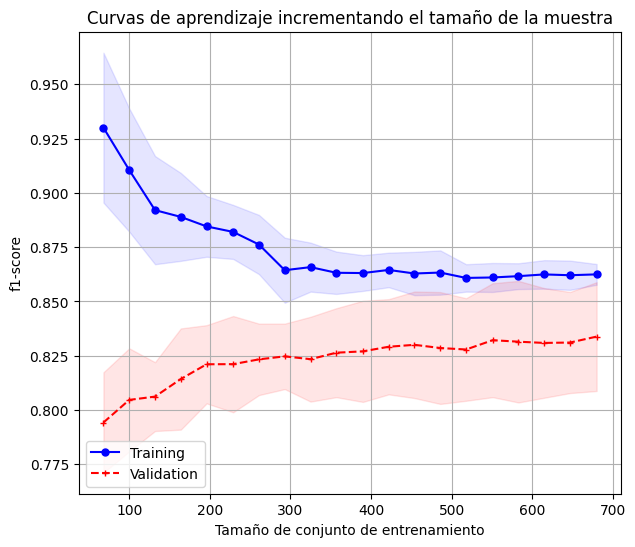

In [12]:
#Ejercicio 4.-6  i
"""
Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando 
el tamaño de la muestra para el modelo de regresión Logística con su 
hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de 
los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del 
desempeño de dicha función “learning_curve()”. 
"""
def mi_ModeloYCurvas(Xin, pipeline, cv, scoring):

       pipelineLR = Pipeline(steps=[('ct',TransformColumns),
                                   ('m',LogisticRegression(max_iter=10000, random_state=1))])

       delta_train_sz = np.linspace(0.1, 1, 20)

       # Other possible scorings check sklearn.metrics.SCORERS.keys()
       tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipelineLR ,    
                                                        X = Xin,
                                                        y = ytv,
                                                        cv = cv ,
                                                        shuffle = True,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=11,scoring ='f1')

       # Obtenemos el gráfico con las curvas de aprendizaje para f1 score:
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 
                                                               'Tamaño de conjunto de entrenamiento', 
                                                               'f1-score', 
                                                               'Curvas de aprendizaje incrementando el tamaño de la muestra')

mi_ModeloYCurvas(Xtv, pipeline, cv, 'f1')


Curvas de aprendizaje de Decision tree


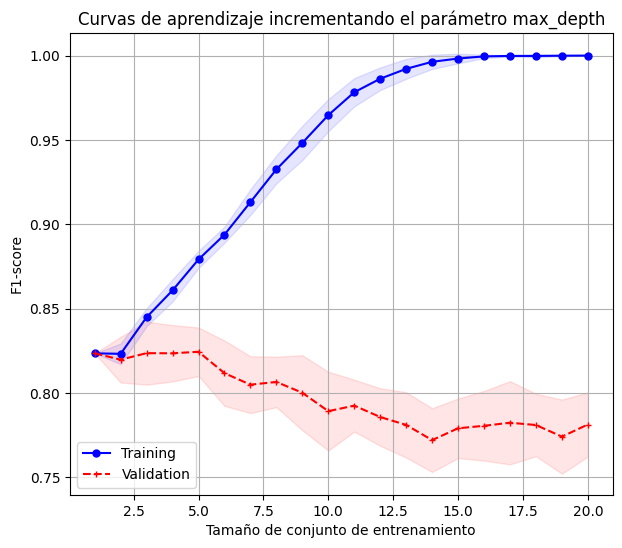

In [13]:
#Ejercicio 4.-6  ii
"""Obtener las curvas de validación (validation_curve) en la cual se va incrementando 
la complejidad del hiperparámetro “max_depth” para el modelo de árbol de 
decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima 
profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del 
desempeño del modelo. 
"""
delta_train_sz = np.linspace(1,20, num=20)
pipelineDT = Pipeline(steps=[('ct',TransformColumns),
                            ('m',DecisionTreeClassifier())])


tr_scores, val_scores = validation_curve(estimator = pipelineDT,    
                                              X = Xtv,
                                              y = ytv,
                                              cv = cv ,
                                              param_name = 'm__max_depth',
                                              param_range = delta_train_sz ,
                                              scoring = 'f1')

print('Curvas de aprendizaje de Decision tree')
mi_LearningCurvePlot(delta_train_sz, tr_scores, val_scores,'Tamaño de conjunto de entrenamiento', 
                                                            'F1-score', 
                                                            'Curvas de aprendizaje incrementando el parámetro max_depth')

c:\Users\ROG1SLP\.conda\envs\master_machine_learning_Class\lib\site-packages\sklearn\preprocessing\_encoders.py:174: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
c:\Users\ROG1SLP\.conda\envs\master_machine_learning_Class\lib\site-packages\sklearn\preprocessing\_encoders.py:174: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


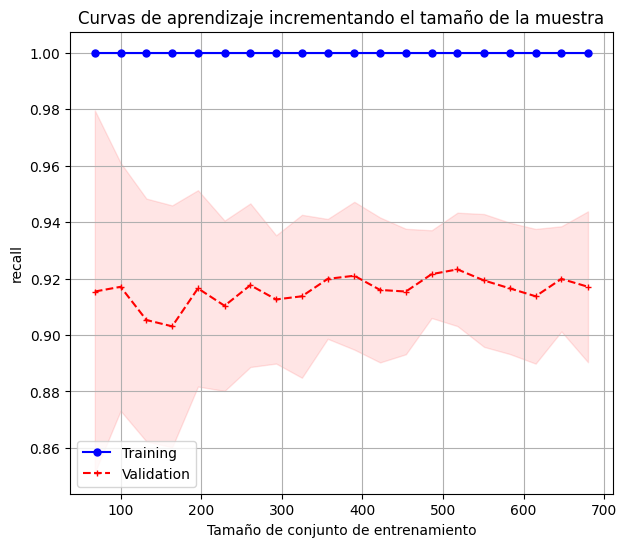

In [14]:
#Ejercicio 4.-6  iii
"""
Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando 
el tamaño de la muestra para el modelo de regresión bosque aleatorio (random 
forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en 
la partición de los conjuntos de entrenamiento y la métrica “recall”, como 
evaluación del desempeño del modelo. 
"""

def mi_ModeloYCurvas(Xin, pipeline, cv, scoring):

       pipelineRF = Pipeline(steps=[('ct',TransformColumns),
                                   ('m',RandomForestClassifier())])

       delta_train_sz = np.linspace(0.1, 1, num=20)

       # Other possible scorings check sklearn.metrics.SCORERS.keys()
       tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipelineRF ,    
                                                        X = Xin,
                                                        y = ytv,
                                                        cv = cv ,
                                                        shuffle = True,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=11,
                                                        scoring ='recall')

       # Obtenemos el gráfico con las curvas de aprendizaje para f1 score:
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 
                                                               'Tamaño de conjunto de entrenamiento', 
                                                               'recall', 
                                                               'Curvas de aprendizaje incrementando el tamaño de la muestra')

mi_ModeloYCurvas(Xtv, pipeline, cv, 'recall')



#**Ejercicio-5.**

Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método GridSearchCV() de scikit-learn. Recuerda que este método hace una búsqueda de los mejores hiperparámetros de un modelo mediante el llamada formato de malla y aplicando validación cruzada. En cada caso puedes incrementar el máximo de iteraciones,”max_iter” para que tengas la convergencia adecuada para todas las combinaciones en cada modelo. Recuerda también aplicar las transformaciones que definiste en tu Pipeline. Para fines de este ejercicio se ha seleccionado para cada modelo una métrica diferente, que permita irte familiarizando con ellas.

Puedes consultar su documentación de GridSearchCV en la siguiente liga:  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html  


    a.  Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1. 
    
    
    
    ¿Cuál es la utilidad de la métrica “f1-score”? 
    
    Incluye tus conclusiones. 
    
    ################### CONCLUSIONES AQUI  ########################
    F1-score se utiliza cuando los Falsos Negativos y los Falsos Positivos son cruciales, a su vez es mejor utilizar el F1-score cuando nustras clases no estan balanceadas, como lo es el caso actual.

    En el mayor de los casos de la vida real, la situacion es la misma y por ello el f1-score es elegido sobre la precision o el recall.

    ################### CONCLUSIONES AQUI  ########################


    
    NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la documentación.

In [15]:
#Getting classes weights (risk or not risk) to compensate imbalance of dataset

# A array object that contains the weights for both classes
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(ytv), y=ytv) 

print(type(class_weights))
print(class_weights)


class_weights_extended = class_weights.tolist()
class_weights_extended.append(None)
#print(class_weights_extended)


<class 'numpy.ndarray'>
[1.66666667 0.71428571]


In [16]:
import warnings
warnings.filterwarnings("ignore")

LRModel = LogisticRegression(max_iter=10000)

parameters = [{'C': [.1,1,10,100],
                        'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 
                        'class_weight':class_weights_extended, 
                        'penalty': ['l1', 'l2', 'elasticnet', 'none'],}
                        ]


GSLR = GridSearchCV(estimator=LRModel,
                    param_grid=parameters,
                    scoring = 'f1', 
                    cv = cv, 
                    n_jobs = -1)

GSLR.fit(Xtv,ytv)
print("Best F1-SCORE scored=%0.3f):" % GSLR.best_score_)

# Ejercicio 5.-a
# Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1. 
#print(GSLR.best_params_)


print('Best C:', GSLR.best_estimator_.get_params()['C'])
print('Best Class weights:', GSLR.best_estimator_.get_params()['class_weight'])
print('Best Penalty:', GSLR.best_estimator_.get_params()['penalty'])
print('Best solver:', GSLR.best_estimator_.get_params()['solver'])
print()

Best F1-SCORE scored=0.840):
Best C: 1
Best Class weights: None
Best Penalty: l1
Best solver: liblinear



    b.  Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento. 

Curvas de aprendizaje de Logistic Regression con los mejores Hiperarametros


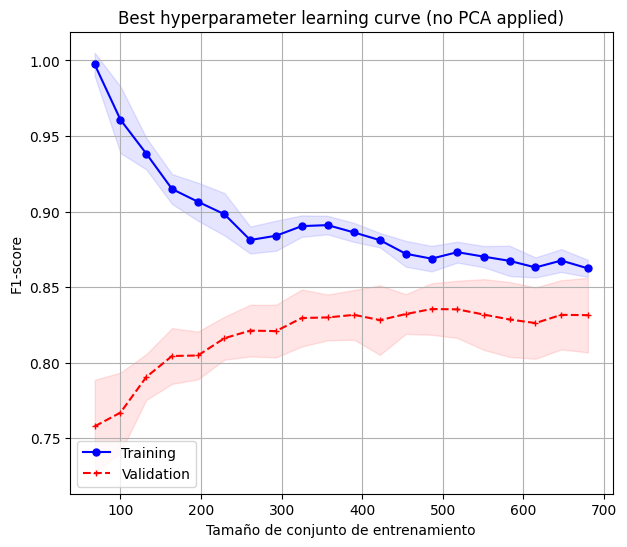

In [17]:
delta_train_sz = np.linspace(0.1,1, num=20)

pipelineLR = Pipeline(steps=[('ct',TransformColumns),
            ('m',LogisticRegression(max_iter=10000, random_state=1,
                                        C = 100, class_weight = 1.66,
                                        penalty = 'l2', solver = 'lbfgs'))])

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipelineLR,    
                                              X = Xtv,
                                              y = ytv,
                                              cv = cv ,
                                              train_sizes = delta_train_sz ,
                                              scoring = 'f1',
                                              random_state=2)

print('Curvas de aprendizaje de Logistic Regression con los mejores Hiperarametros')
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,'Tamaño de conjunto de entrenamiento', 'F1-score','Best hyperparameter learning curve (no PCA applied)')

    c.  Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “precision”.
    
     ¿Cuál es la utilidad de la métrica “precision”? 
     Incluye tus conclusiones. 

    ################### CONCLUSIONES AQUI  ########################
    
    
    ################### CONCLUSIONES AQUI  ########################



In [30]:
import warnings
warnings.filterwarnings("ignore")

PenaltyList = list()
PenaltyList = ['l1', 'l2', 'elasticnet', 'none']

DTModel = DecisionTreeClassifier()

GSDT = GridSearchCV(estimator=DTModel,
                                        param_grid={'ccp_alpha': [.1,1,10,100],
                                        'criterion': ('gini', 'entropy', 'log_loss'), 
                                        'max_depth': [1,6,12,18,24,30,32], 
                                        'min_samples_split':[2,4,6,8,12], 
                                        'class_weight': class_weights_extended}, 
                                        cv = cv, scoring = 'precision')

GSDT.fit(Xtv,ytv)
print("Best PRECISION scored=%0.3f):" % GSDT.best_score_)
print(GSDT.best_params_)

print('Best ccp_alpha:', GSDT.best_estimator_.get_params()['ccp_alpha'])
print('Best class_weight:', GSDT.best_estimator_.get_params()['class_weight'])
print('Best criterion:', GSDT.best_estimator_.get_params()['criterion'])
print('Best max_depth:', GSDT.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', GSDT.best_estimator_.get_params()['min_samples_split'])
print()

Best PRECISION scored=0.700):
{'ccp_alpha': 0.1, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}
Best ccp_alpha: 0.1
Best class_weight: None
Best criterion: gini
Best max_depth: 1
Best min_samples_split: 2




    d. Con los mejores valores de los hiperparámetros encontrados con la métrica “precision” para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento. 

Curvas de aprendizaje de Decision tree


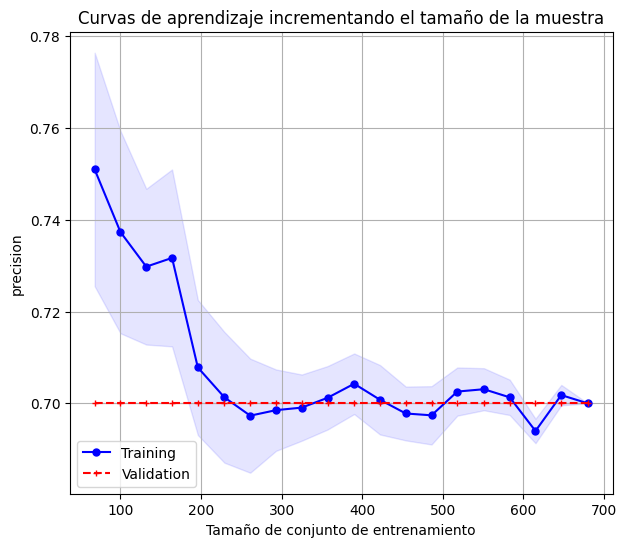

In [21]:
delta_train_sz = np.linspace(0.1,1, num=20)


pipelineDT = Pipeline(steps=[('ct',TransformColumns),
                                                    ('m',DecisionTreeClassifier(ccp_alpha = 0.1, 
                                                    class_weight = None, 
                                                    criterion = 'gini', 
                                                    max_depth=1, 
                                                    min_samples_split = 2))])

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipelineDT,    
                                              X = Xtv,
                                              y = ytv,
                                              cv = cv ,
                                              train_sizes = delta_train_sz ,
                                              scoring = 'precision',
                                              random_state=2)

print('Curvas de aprendizaje de Decision tree')
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,'Tamaño de conjunto de entrenamiento', 'precision','Curvas de aprendizaje incrementando el tamaño de la muestra')

    e.  Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”. 
    Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “recall”.
    
        ¿Cuál es la utilidad de la métrica “recall”?
         Incluye tus conclusiones.


    ################### CONCLUSIONES AQUI  ########################
    El recall se calcula como la relación entre el número de muestras positivas clasificadas correctamente como positivas y el número total de muestras positivas. El recall mide la capacidad del modelo para detectar VERDADERO POSITIVOS. Cuanto mayor sea el recall, más muestras VERDADERO POSITIVOS detectadas.

    
    ################### CONCLUSIONES AQUI  ########################


    NOTA: Toma en cuenta que el método de random forest pude tardar varios minutos en llevar a cabo 

In [31]:
import warnings
warnings.filterwarnings("ignore")

delta_train_sz = np.linspace(0.1, 1, num=20)

RFModel = RandomForestClassifier()

GSRF = GridSearchCV(estimator=RFModel,
                    param_grid={'ccp_alpha': [.1,10,100],
                    'criterion': ('gini', 'entropy'), 
                    'max_depth': [1,3,5,7,9], 
                    'min_samples_split':[2,4,6], 
                    'class_weight':[0.1,None], 
                    'min_samples_leaf': [2,4,6]}, 
                    cv = cv, 
                    scoring = 'recall')

GSRF.fit(Xtv,ytv)
print("Best parameter (recall score=%0.3f):" % GSRF.best_score_)
#print(GSRF.best_params_)

print('Best ccp_alpha:', GSRF.best_estimator_.get_params()['ccp_alpha'])
print('Best class_weight:', GSRF.best_estimator_.get_params()['class_weight'])
print('Best criterion:', GSRF.best_estimator_.get_params()['criterion'])
print('Best max_depth:', GSRF.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', GSRF.best_estimator_.get_params()['min_samples_leaf'])
print('Best min_samples_split:', GSRF.best_estimator_.get_params()['min_samples_split'])

Best parameter (recall score=1.000):
{'ccp_alpha': 0.1, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best ccp_alpha: 0.1
Best class_weight: None
Best criterion: gini
Best max_depth: 1
Best min_samples_leaf: 2
Best min_samples_split: 2


    f.  Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para el modelo de bosque aleatorio, obtener las curvas de validación (validation curve), incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.

Curvas de aprendizaje de Logistic Regression


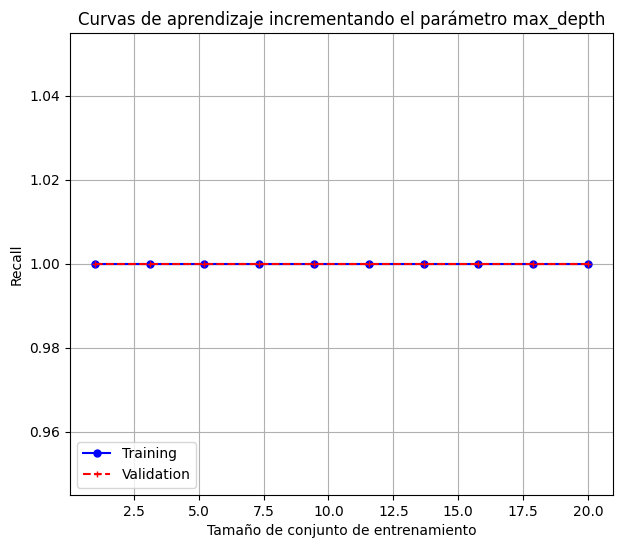

In [23]:
delta_train_sz = np.linspace(1,20, num=10)

tr_scores, val_scores = validation_curve(estimator = RandomForestClassifier(ccp_alpha = 0.1,
                                                class_weight = None,
                                                criterion = 'gini',
                                                min_samples_leaf = 2, 
                                                min_samples_split = 2),    
                                                X = Xtv,
                                                y = ytv,
                                                cv = cv ,
                                                param_name = 'max_depth',
                                                param_range = delta_train_sz,
                                                scoring = 'recall')

print('Curvas de aprendizaje de Logistic Regression')
mi_LearningCurvePlot(delta_train_sz, tr_scores, val_scores,'Tamaño de conjunto de entrenamiento', 'Recall', 'Curvas de aprendizaje incrementando el parámetro max_depth')

#**Ejercicio-6.**

Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para entrenamiento y validación: 


    a.  Obtener el  modelo de regresión logística con los mejores parámetros que hayas encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final obtenido. 

In [24]:

Get_Optimal_Estimator = GSLR.best_estimator_
Predictions = Get_Optimal_Estimator.predict(Xtv)
print("El f1-score con el mejor predictor es: %.3f \n" %(mi_f1score(ytv, Predictions)))

BestLRModel = LogisticRegression(max_iter=10000, random_state=1,
                                        C = 100, class_weight = 1.66,
                                        penalty = 'l2', solver = 'lbfgs')
BestLRModel.fit(Xtv,ytv)
ypred = BestLRModel.predict(Xtest)
r = classification_report(ytest, ypred)
print("Este es el detalle de las métricas del mejor modelo:\n\n", r)

El f1-score con el mejor predictor es: 0.854 

Este es el detalle de las métricas del mejor modelo:

               precision    recall  f1-score   support

           0       0.58      0.31      0.41        45
           1       0.75      0.90      0.82       105

    accuracy                           0.73       150
   macro avg       0.67      0.61      0.61       150
weighted avg       0.70      0.73      0.70       150



    b.  Obtener el  modelo de árbol de decisiones con los mejores parámetros que hayas encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.

In [32]:
Get_Optimal_Estimator = GSDT.best_estimator_
Predictions = Get_Optimal_Estimator.predict(Xtv)
print("La precision con el mejor predictor es: %.3f \n" %(mi_precision(ytv, Predictions)))

BestDTModel = DecisionTreeClassifier(ccp_alpha = 0.1, 
                                                    class_weight = None, 
                                                    criterion = 'gini', 
                                                    max_depth=1, 
                                                    min_samples_leaf = 2,
                                                    min_samples_split = 2)                                                 
BestDTModel.fit(Xtv,ytv)
ypred = BestDTModel.predict(Xtest)
r = classification_report(ytest, ypred)
print("Este es el detalle de las métricas del mejor modelo:\n\n", r)

La precision con el mejor predictor es: 0.700 

Este es el detalle de las métricas del mejor modelo:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.70      1.00      0.82       105

    accuracy                           0.70       150
   macro avg       0.35      0.50      0.41       150
weighted avg       0.49      0.70      0.58       150




    c.   Obtener el  modelo de bosque aleatorio con los mejores parámetros que hayas encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.  

In [26]:
Get_Optimal_Estimator = GSDT.best_estimator_
Predictions = Get_Optimal_Estimator.predict(Xtv)
print("El recall con el mejor predictor es: %.3f \n" %(mi_recall(ytv, Predictions)))

BestRFModel = RandomForestClassifier(ccp_alpha = 0.1,
                                                class_weight = None,
                                                criterion = 'gini',
                                                min_samples_leaf = 2, 
                                                min_samples_split = 2)
BestRFModel.fit(Xtv,ytv)
ypred = BestRFModel.predict(Xtest)
r = classification_report(ytest, ypred)
print("Este es el detalle de las métricas del mejor modelo:\n\n", r)

El recall con el mejor predictor es: 1.000 

Este es el detalle de las métricas del mejor modelo:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.70      1.00      0.82       105

    accuracy                           0.70       150
   macro avg       0.35      0.50      0.41       150
weighted avg       0.49      0.70      0.58       150



In [27]:
## Conclusiones Finales:

###**Fin de la Actividad de la semana 6.**